In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
df = pd.read_csv("C:\\Users\\hp\\Desktop\\mycode\\UScomments.csv")
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending ðŸ˜‰,3,0


In [2]:
df.dropna()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending ðŸ˜‰,3,0
...,...,...,...,...
4805,62cWuFjzOgs,Hey definitely ruined this with the fucking re...,0,0
4806,62cWuFjzOgs,I have a apple watch series1 but I want to get...,0,0
4807,62cWuFjzOgs,you can see the phone complication up there......,0,0
4808,62cWuFjzOgs,absolutely no immeasurable difference between ...,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      4810 non-null   object
 1   comment_text  4810 non-null   object
 2   likes         4810 non-null   int64 
 3   replies       4810 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 150.4+ KB


In [4]:
df

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending ðŸ˜‰,3,0
...,...,...,...,...
4805,62cWuFjzOgs,Hey definitely ruined this with the fucking re...,0,0
4806,62cWuFjzOgs,I have a apple watch series1 but I want to get...,0,0
4807,62cWuFjzOgs,you can see the phone complication up there......,0,0
4808,62cWuFjzOgs,absolutely no immeasurable difference between ...,0,0


In [5]:
def preprocessing(sent):
    sent = str(sent)
    sent = sent.lower()
    sent = sent.replace('{html}',"")
    clean = re.compile('<.*?>')
    cleant = re.sub(clean,"",sent)
    remUrl = re.sub(r'http\S+',"",cleant)
    remNum = re.sub('[0-9]+',"",remUrl)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(remNum)
    filteredWords = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stemWords = [stemmer.stem(w) for w in filteredWords]
    lemmaWords = [lemmatizer.lemmatize(w) for w in stemWords]
    return " ".join(filteredWords)


In [6]:
df['cleaned_text'] = df['comment_text'].map(lambda x: preprocessing(x))
df.head()

,video_id,comment_text,likes,replies,cleaned_text
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸,4,0,logan paul big day
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,following start vine channel seen vlogs
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,say kong maverick
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,fan attendance
4,XpVt6Z1Gjjo,trending ðŸ˜‰,3,0,trending


In [7]:
def subjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def polarity(txt):
    return TextBlob(txt).sentiment.polarity

df['subjectivity'] = df['cleaned_text'].apply(sub)
df.head()

,video_id,comment_text,likes,replies,cleaned_text,subjectivity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸,4,0,logan paul big day,0.1
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,following start vine channel seen vlogs,0.1
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,say kong maverick,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,fan attendance,0.0
4,XpVt6Z1Gjjo,trending ðŸ˜‰,3,0,trending,0.0


In [8]:
df['polarity'] = df['cleaned_text'].apply(pol)
df

,video_id,comment_text,likes,replies,cleaned_text,subjectivity,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸,4,0,logan paul big day,0.1,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,following start vine channel seen vlogs,0.1,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,say kong maverick,0.0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,fan attendance,0.0,0.000000
4,XpVt6Z1Gjjo,trending ðŸ˜‰,3,0,trending,0.0,0.000000
...,...,...,...,...,...,...,...
4805,62cWuFjzOgs,Hey definitely ruined this with the fucking re...,0,0,hey definitely ruined fucking red thing ugly t...,0.5,-0.233333
4806,62cWuFjzOgs,I have a apple watch series1 but I want to get...,0,0,apple watch series want get series,0.0,0.000000
4807,62cWuFjzOgs,you can see the phone complication up there......,0,0,see phone complication complication give break,0.0,0.000000
4808,62cWuFjzOgs,absolutely no immeasurable difference between ...,0,0,absolutely immeasurable difference,0.9,0.200000


In [9]:
def sent(val):
    if val > 0:
        return 'positive'
    elif val == 0:
        return 'neutral'
    else:
        return 'negative'
df['sentiment_analysis'] = df['polarity'].apply(sen)
df

,video_id,comment_text,likes,replies,cleaned_text,subjectivity,polarity,sentiment_analysis
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸,4,0,logan paul big day,0.1,0.000000,neutral
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,following start vine channel seen vlogs,0.1,0.000000,neutral
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,say kong maverick,0.0,0.000000,neutral
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,fan attendance,0.0,0.000000,neutral
4,XpVt6Z1Gjjo,trending ðŸ˜‰,3,0,trending,0.0,0.000000,neutral
...,...,...,...,...,...,...,...,...
4805,62cWuFjzOgs,Hey definitely ruined this with the fucking re...,0,0,hey definitely ruined fucking red thing ugly t...,0.5,-0.233333,negative
4806,62cWuFjzOgs,I have a apple watch series1 but I want to get...,0,0,apple watch series want get series,0.0,0.000000,neutral
4807,62cWuFjzOgs,you can see the phone complication up there......,0,0,see phone complication complication give break,0.0,0.000000,neutral
4808,62cWuFjzOgs,absolutely no immeasurable difference between ...,0,0,absolutely immeasurable difference,0.9,0.200000,positive


In [10]:
#Positivity:
pos_sent = df[df['sentiment_analysis'] == 'positive']
print("Positivity of data is: ",round((pos_sent.shape[0]/df.shape[0])*100,1),"%")

Positivity of data is:  40.2 %


In [11]:
#Negativity:
neg_sent = df[df['sentiment_analysis'] == 'negative']
print("Negativity of data is: ",round((neg_sent.shape[0]/df.shape[0])*100,1),"%")

Negativity of data is:  16.5 %


In [12]:
#Neutrality:
neu_sent = df[df['sentiment_analysis'] == 'neutral']
print("Neutrality of data is: ",round((neg_sent.shape[0]/df.shape[0])*100,1),"%")

Neutrality of data is:  16.5 %


In [13]:
df['sentiment_analysis'].value_counts()

neutral     2081
positive    1934
negative     795
Name: sentiment_analysis, dtype: int64

<AxesSubplot:>

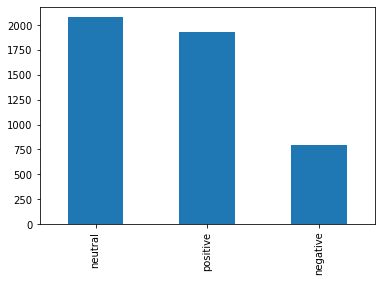

In [14]:
df['sentiment_analysis'].value_counts().plot(kind="bar")